In [1]:
# Importing all required Libraries ----------------------------------------------------------------

import numpy as np
import pandas as pd
import seaborn as sns
import os

In [2]:
# Reading out all the files to be examined --------------------------------------------------------

Ratings = pd.read_csv('users-books-dataset/BX-Book-Ratings.csv', sep=';',encoding='latin-1')
Users = pd.read_csv('users-books-dataset/BX-Users.csv', sep=';',encoding='latin-1')
Books = pd.read_csv('users-books-dataset/BX-Books.csv', sep=';',encoding='latin-1',escapechar='\\')

In [3]:
# Combining dataframes to get the new as a whole data sets
# here we'll merge based on ISBN and User id and the type will be inner join.

Result=(Ratings.merge(Books, on=['ISBN'])).merge(Users, on=['User-ID'])
Result.set_index('ISBN', inplace=True)  # Setting ISBN as index

In [4]:
# Question No.1 -----------------------------------
# Checking for duplicate values for all column values matching
# if any duplicate found, then sum it, that will result the size of redundant data present.
# If not, then Redundant data will be 0.

(Result.duplicated()==True).sum()

0

In [5]:
# Same for false value that is 'not duplicate'
# Or just confirming wheather the false count is same as the size of series

# Comment either of below statement to get results either in boolean or in integer
# ---------------------------------------------------------

# (Result.duplicated()==False).sum()
(Result.duplicated()==False).sum()==Result.count()



User-ID                 True
Book-Rating             True
Book-Title              True
Book-Author            False
Year-Of-Publication     True
Publisher              False
Image-URL-S             True
Image-URL-M             True
Image-URL-L             True
Location                True
Age                    False
dtype: bool

In [6]:
# check for inconsistency
Result['Year-Of-Publication'].max()

2050

In [7]:
# check for inconsistency
Result['Age'].max()

244.0

In [8]:
# Now we'll check for inconsistent datas 
# For that we need sample of some 10 items to interpret our assumptions
Result.sample(10)

User-ID  Book-Rating  \
ISBN                               
006001203X    60244            0   
0877952612   206979            0   
0802713432   142134            9   
8495359464   206932            8   
0679441891   231210            0   
0151008116   198288            0   
0399501487   225810            0   
0064403149   232964            0   
0380978407    84476            9   
0671767895    84627            7   

                                                   Book-Title  \
ISBN                                                            
006001203X                    Dr. Atkins' New Diet Revolution   
0877952612                                     Labors of Love   
0802713432  Galileo's Daughter: A Historical Memoir of Sci...   
8495359464                                Opiniones Mohicanas   
0679441891                                  Our Game: A Novel   
0151008116                                         Life of Pi   
0399501487                                  Lord of the Flies   
0064403149  The Last of the Really Great Whangdoodles 30th...   
0380978407  Lamb: The Gospel According to Biff, Christ's C...   
0671767895  Complexity: The Emerging Science at the Edge o...   

                       Book-Author  Year-Of-Publication  \
ISBN                                                      
006001203X        Robert C. Atkins                 2001   
0877952612            R.V. Cassill                 1980   
0802713432              Dava Sobel                 1999   
8495359464          Jorge Herralde                 2003   
0679441891           John Le Carre                 1995   
0151008116             Yann Martel                 2002   
0399501487  William Gerald Golding                 1959   
0064403149   Julie Andrews Edwards                 2003   
0380978407       Christopher Moore                 2002   
0671767895     M. Mitchell Waldrop                 1992   

                               Publisher  \
ISBN                                       
006001203X                    Avon Books   
0877952612            Arbor House Pub Co   
0802713432          Walker &amp; Company   
8495359464                 El Acantilado   
0679441891              Random House Inc   
0151008116                      Harcourt   
0399501487                 Perigee Trade   
0064403149                  HarperTrophy   
0380978407  William Morrow &amp; Company   
0671767895          Simon &amp; Schuster   

                                                  Image-URL-S  \
ISBN                                                            
006001203X  http://images.amazon.com/images/P/006001203X.0...   
0877952612  http://images.amazon.com/images/P/0877952612.0...   
0802713432  http://images.amazon.com/images/P/0802713432.0...   
8495359464  http://images.amazon.com/images/P/8495359464.0...   
0679441891  http://images.amazon.com/images/P/0679441891.0...   
0151008116  http://images.amazon.com/images/P/0151008116.0...   
0399501487  http://images.amazon.com/images/P/0399501487.0...   
0064403149  http://images.amazon.com/images/P/0064403149.0...   
0380978407  http://images.amazon.com/images/P/0380978407.0...   
0671767895  http://images.amazon.com/images/P/0671767895.0...   

                                                  Image-URL-M  \
ISBN                                                            
006001203X  http://images.amazon.com/images/P/006001203X.0...   
0877952612  http://images.amazon.com/images/P/0877952612.0...   
0802713432  http://images.amazon.com/images/P/0802713432.0...   
8495359464  http://images.amazon.com/images/P/8495359464.0...   
0679441891  http://images.amazon.com/images/P/0679441891.0...   
0151008116  http://images.amazon.com/images/P/0151008116.0...   
0399501487  http://images.amazon.com/images/P/0399501487.0...   
0064403149  http://images.amazon.com/images/P/0064403149.0...   
0380978407  http://images.amazon.com/images/P/0380978407.0...   
0671767895  http://images.amazon.com/images/P/0671767895.0...   

In [9]:
# Limit values by providing constraints
age_Limit = [18, 80]
year = [1900, 2020]
Result.drop(Result[Result['Age'] > age_Limit[1]].index, inplace=True)
Result.drop(Result[Result['Age'] < age_Limit[0]].index, inplace=True)
Result.drop(Result[Result['Year-Of-Publication'] < year[0]].index, inplace=True)
Result.drop(Result[Result['Year-Of-Publication'] > year[1]].index, inplace=True)

In [10]:
# check value to assure its legit
# comment either of them to get results
# -------------------------------------------------------

Result['Year-Of-Publication'].min()
Result['Year-Of-Publication'].max()


2020

In [11]:
# check value to assure its legit
# comment either of them to get results
# -------------------------------------------------------

Result['Age'].max()
Result['Age'].min()

18.0

In [12]:
# Question No.2 -----------------------------------
# Finding missing values and identifying outliers

In [13]:
(Result[:].isnull()==True).sum()

User-ID                     0
Book-Rating                 0
Book-Title                  0
Book-Author                 1
Year-Of-Publication         0
Publisher                   2
Image-URL-S                 0
Image-URL-M                 0
Image-URL-L                 0
Location                    0
Age                    185736
dtype: int64

In [14]:
Result['Age'].interpolate(inplace=True)

In [15]:
(Result[:].isnull()==True).sum()

User-ID                0
Book-Rating            0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            0
Location               0
Age                    0
dtype: int64

<AxesSubplot:xlabel='Age'>

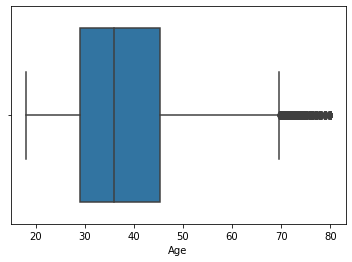

In [16]:
# Managing Outliers
sns.boxplot(x=Result['Age'])

<AxesSubplot:xlabel='Year-Of-Publication'>

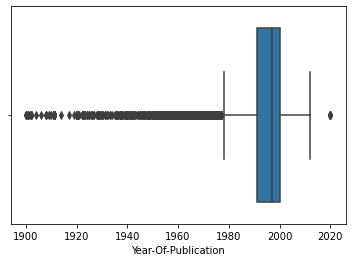

In [17]:
# Managing Outliers
sns.boxplot(x=Result['Year-Of-Publication'])

In [18]:
def outliers(col):
    q1 = Result[col].quantile(.25)
    q3 = Result[col].quantile(.75)
    IQR = q3-q1
    leftLimit = q1-1.5*IQR
    rightLimit = q3+1.5*IQR
    return leftLimit, rightLimit

In [19]:
# Restricting column name to eliminate outliers
col = ['Age', 'Year-Of-Publication']
for i in col:
    limit = outliers(i)
    Result.drop(Result[Result[i] < limit[0]].index, inplace=True)
    Result.drop(Result[Result[i] > limit[1]].index, inplace=True)


<AxesSubplot:xlabel='Year-Of-Publication'>

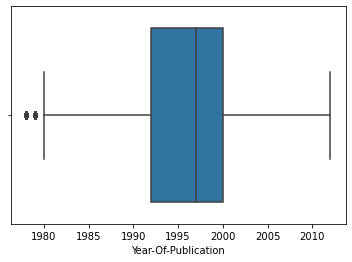

In [20]:
# checking Results
sns.boxplot(x=Result['Year-Of-Publication'])

<AxesSubplot:xlabel='Age'>

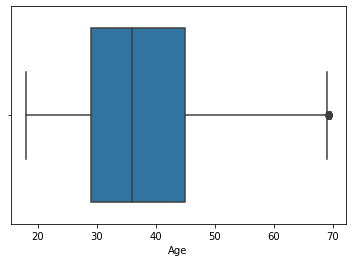

In [21]:
# checking Results
sns.boxplot(x=Result['Age'])

<AxesSubplot:ylabel='Density'>

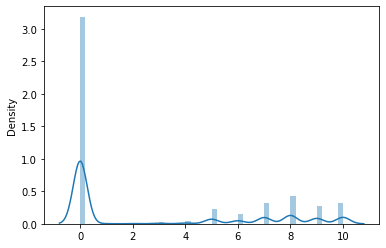

In [22]:
sns.distplot(x=Result['Book-Rating'])

In [23]:
Result['Age'] = Result['Age'].astype(int)

In [24]:
Result.sample(5)

User-ID  Book-Rating                               Book-Title  \
ISBN                                                                        
1592866107    98391            9                              Sam's Ghost   
0684850354   237091            7                      Blessings : A Novel   
0843138114   185233            0  Wee Sing Nursery Rhymes &amp; Lullabies   
0452254833    90049            9                          Bound for glory   
0515132136     9624            0                                 The Jury   

                  Book-Author  Year-Of-Publication             Publisher  \
ISBN                                                                       
1592866107        Tony Ardito                 2003        PublishAmerica   
0684850354   Sheneska Jackson                 1998  Simon &amp; Schuster   
0843138114  Pamela Conn Beall                 1996     Price Stern Sloan   
0452254833      Woody Guthrie                 1983  New American Library   
0515132136      Steve Martini                 2002            Jove Books   

                                                  Image-URL-S  \
ISBN                                                            
1592866107  http://images.amazon.com/images/P/1592866107.0...   
0684850354  http://images.amazon.com/images/P/0684850354.0...   
0843138114  http://images.amazon.com/images/P/0843138114.0...   
0452254833  http://images.amazon.com/images/P/0452254833.0...   
0515132136  http://images.amazon.com/images/P/0515132136.0...   

                                                  Image-URL-M  \
ISBN                                                            
1592866107  http://images.amazon.com/images/P/1592866107.0...   
0684850354  http://images.amazon.com/images/P/0684850354.0...   
0843138114  http://images.amazon.com/images/P/0843138114.0...   
0452254833  http://images.amazon.com/images/P/0452254833.0...   
0515132136  http://images.amazon.com/images/P/0515132136.0...   

                                                  Image-URL-L  \
ISBN                                                            
1592866107  http://images.amazon.com/images/P/1592866107.0...   
0684850354  http://images.amazon.com/images/P/0684850354.0...   
0843138114  http://images.amazon.com/images/P/0843138114.0...   
0452254833  http://images.amazon.com/images/P/0452254833.0...   
0515132136  http://images.amazon.com/images/P/0515132136.0...   

                                      Location  Age  
ISBN                                                 
1592866107                morrow, georgia, usa   52  
0684850354          fair lawn, new jersey, usa   54  
0843138114             winnemucca, nevada, usa   31  
0452254833  victoria, british columbia, canada   30  
0515132136           destrehan, louisiana, usa   41

In [25]:
# Question No. 3    -----------------------------------
# Normalisation class for calculating values
class normalization:
    """
    This class is having three form
    1. minMax(element = "element of a list(must be numeric)", min = "min value among all the lists", max = "max value among the list")
    2. decScale(element , max)
    3. zScore(x, mean, standard-Deviation)
    """
    def minMax(x,min,max):
        """"
        x is the current element
        min is the minimum of the list
        max is the maximum of the list """
        newMax = 1
        newMin = 0
        val = ((x-min)*(newMax-newMin)/(max-min))+newMin
        return val
    
    def decScale(x, max):
        """"
        x is the current element
        max is the maximum of the list """
        n = len(str(max))
        val = x/(10**n)
        return val
    
    def zScore(x, mean, stdevi):
        """"
        x is the current element
        mean is the mean of the list
        stdev is the standard deviation of the list """
        val = (x-mean)/stdevi
        return val

In [27]:
# applying Min Max Normalization to 'Age', 'Year of publication', and 'Ratings'

col = ['Age', 'Year-Of-Publication', 'Book-Rating']
minMax = pd.DataFrame(columns=col)
dScale = pd.DataFrame(columns=col)
zScore = pd.DataFrame(columns=col)

for i in col:
    # Min Max Transformation
    min = Result[i].min()
    max = Result[i].max()
    minMax[i] = Result[i].apply(normalization.minMax, args=(min,max))
    # Decimal Scaling
    dScale[i] = Result[i].apply(normalization.decScale, args=(max,))
    # Z Score
    mean = np.mean(Result[i])
    stdv = np.std(Result[i])
    zScore[i] = Result[i].apply(normalization.zScore, args=(mean, stdv))

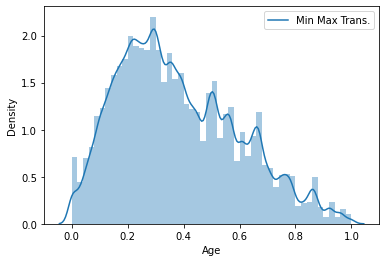

In [28]:
i = col[0]
fig = sns.distplot(x=minMax[i],axlabel=i)
fig.legend(labels=['Min Max Trans.'])

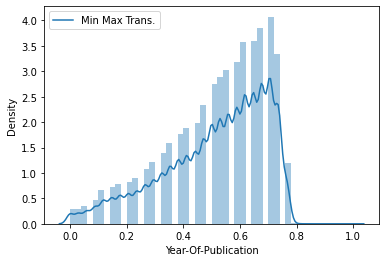

In [29]:
i = col[1]
fig = sns.distplot(x=minMax[i],axlabel=i)
fig.legend(labels=['Min Max Trans.'])

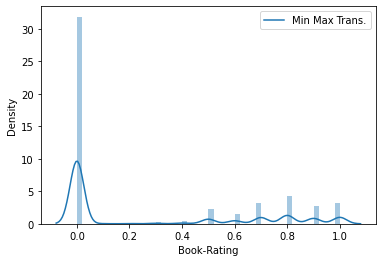

In [30]:
i = col[2]
fig = sns.distplot(x=minMax[i],axlabel=i)
fig.legend(labels=['Min Max Trans.'])

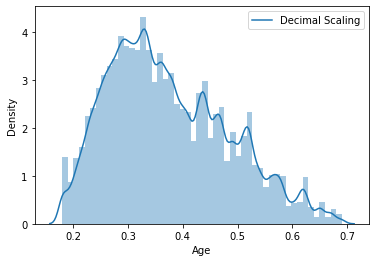

In [31]:
i = col[0]
fig = sns.distplot(x=dScale[i],axlabel=i)
fig.legend(labels=['Decimal Scaling'])

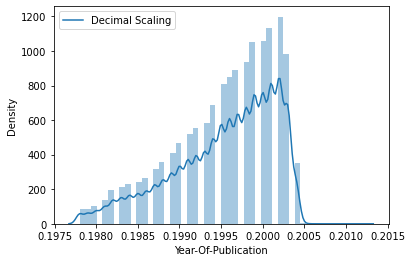

In [32]:
i = col[1]
fig = sns.distplot(x=dScale[i],axlabel=i)
fig.legend(labels=['Decimal Scaling'])

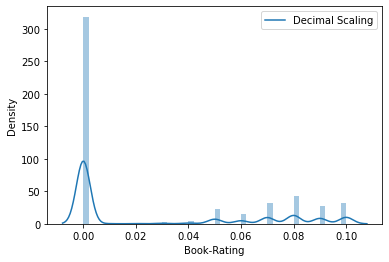

In [33]:
i = col[2]
fig = sns.distplot(x=dScale[i],axlabel=i)
fig.legend(labels=['Decimal Scaling'])

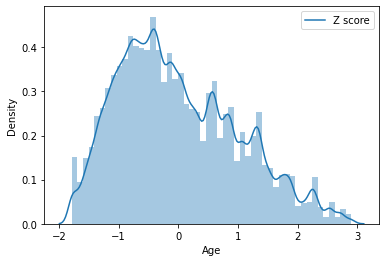

In [34]:
i = col[0]
fig = sns.distplot(x=zScore[i],axlabel=i)
fig.legend(labels=['Z score'])

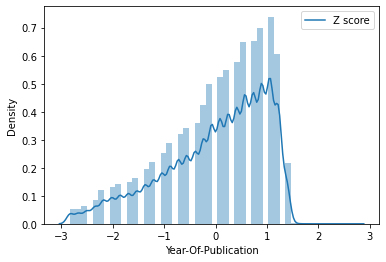

In [35]:
i = col[1]
fig = sns.distplot(x=zScore[i],axlabel=i)
fig.legend(labels=['Z score'])

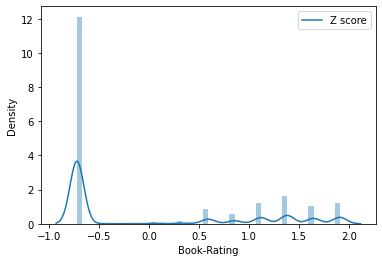

In [36]:
i = col[2]
fig = sns.distplot(x=zScore[i],axlabel=i)
fig.legend(labels=['Z score'])

In [37]:
# Question No. 4 ----------------------------------------------------------------

In [38]:
# Square Transformation for Age --------------------------------------------------------
col = ['Age', 'Year-Of-Publication', 'Book-Rating'] 

data = Result[col[0]].transform(func = lambda x:x**(1/2))


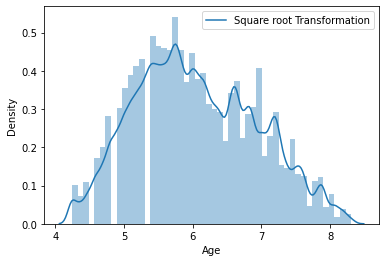

In [39]:
fig = sns.distplot(x=data, axlabel=col[0])
fig.legend(labels=['Square root Transformation'])

In [40]:
# Square Transformation for Year --------------------------------------------------------
data = Result[col[1]].transform(func = lambda x:x**(1/2))


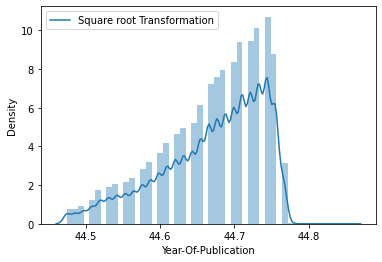

In [41]:
fig = sns.distplot(x=data, axlabel=col[1])
fig.legend(labels=['Square root Transformation'])

In [42]:
# Square Transformation for ratings --------------------------------------------------------
data = Result[col[2]].transform(func = lambda x:x**(1/2))


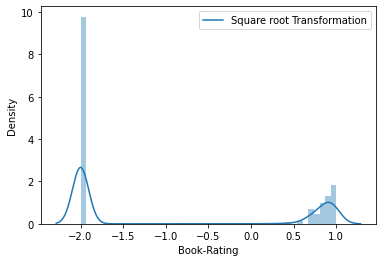

In [49]:
fig = sns.distplot(x=data, axlabel=col[2])
fig.legend(labels=['Square root Transformation'])

In [44]:
# Log Transformation for Age --------------------------------------------------------
data = Result[col[0]].transform(func = lambda x: np.log10(x))

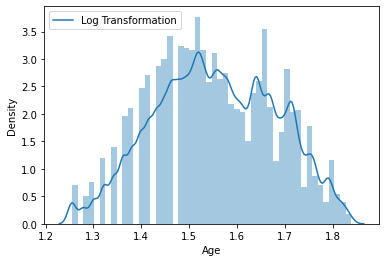

In [45]:
fig = sns.distplot(x=data, axlabel=col[0])
fig.legend(labels=['Log Transformation'])

In [46]:
# Log Transformation for Year --------------------------------------------------------
data = Result[col[1]].transform(func = lambda x: np.log10(x))

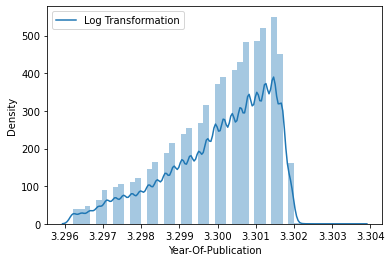

In [47]:
fig = sns.distplot(x=data, axlabel=col[1])
fig.legend(labels=['Log Transformation'])

In [48]:
# Log Transformation for Ratings --------------------------------------------------------
data = Result[col[2]].transform(func = lambda x : np.log10(0.01) if (x == 0) else np.log10(x))

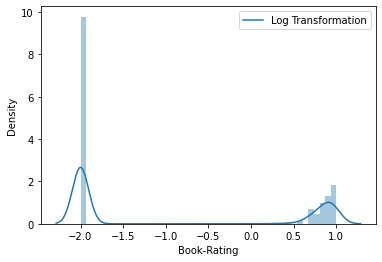

In [50]:
fig = sns.distplot(x=data, axlabel=col[2])
fig.legend(labels=['Log Transformation'])